In [155]:
using DataFrames, CSV, LinearAlgebra, Optim, StatsBase,Distributions
using PythonPlot, Profile, ProfileCanvas
cd(dirname(@__FILE__))
include("./../src/GrowthTraceTools.jl")
using .GrowthTraceTools

FIG_PATH = "./../figures"

"./../figures"

In [180]:

τ_range = [5.0]
Td = 13. # generation time 
σλbar2 = 10^-5
σc_range = collect(LinRange(10^(-8)*sqrt(σλbar2), sqrt(σλbar2), 20))
Δ = 0.5
λ0 = 10^-1
σM = 10^-5
nreps = 2

2

In [187]:
sims = []
k = 1.
for s in σc_range
    for τ in τ_range
        println("-----------------------------------------------------")
        # s^2 = 2*D/(g^2Td)
        # σλbar2 = s^2 + (τ^2/Td^2)*σDN^2 (equations 11,12,13 in paper)
        # solve for D
        D = s .^2*Td/2/τ^2
        σDN = τ/Td*sqrt(σλbar2 - s.^2) # this called σz in the paper -- sorry!
        D,σDN = solve_D_σz_from_s2_and_varbar(1/τ, Td, s^2, σλbar2)
        println("τ = "*string(τ)*", D = "*string(D))

        
        
        # Setup parameters
        θ = (
            Δ = Δ,
            σDN =σDN,
            τ = τ,
            D = D,
            λ0 = λ0,
            σM = σM
        )

        for i in 1:nreps
            println("    θ = ", θ)
            init = [θ.Δ, θ.λ0 + rand(Normal(0, sqrt(D * τ))), 2 * θ.Δ]
            dt = 0.01
            sim = GrowthTraceTools.simulate_ou(θ, init,collect(0:0.1:12*20) )
            sim[:, :replicate] .= i
            sim[:, :lineage] .= k
            sim[:, :τ] .= τ
            sim[:, :D] .= θ.D
            sim[:, :σDN] .= θ.σDN
            sim[:, :σ2c] .= s

            push!(sims, sim)
            k += 1
        end
    end
end

-----------------------------------------------------
τ = 5.0, D = 4.03757192848361e-22
    θ = (Δ = 0.5, σDN = 0.00888158933670515, τ = 5.0, D = 4.03757192848361e-22, λ0 = 0.1, σM = 1.0e-5)
    θ = (Δ = 0.5, σDN = 0.00888158933670515, τ = 5.0, D = 4.03757192848361e-22, λ0 = 0.1, σM = 1.0e-5)
-----------------------------------------------------
τ = 5.0, D = 1.1184413800580705e-8
    θ = (Δ = 0.5, σDN = 0.00886927943122401, τ = 5.0, D = 1.1184413800580705e-8, λ0 = 0.1, σM = 1.0e-5)
    θ = (Δ = 0.5, σDN = 0.00886927943122401, τ = 5.0, D = 1.1184413800580705e-8, λ0 = 0.1, σM = 1.0e-5)
-----------------------------------------------------
τ = 5.0, D = 4.473764670217026e-8
    θ = (Δ = 0.5, σDN = 0.00883224678351879, τ = 5.0, D = 4.473764670217026e-8, λ0 = 0.1, σM = 1.0e-5)
    θ = (Δ = 0.5, σDN = 0.00883224678351879, τ = 5.0, D = 4.473764670217026e-8, λ0 = 0.1, σM = 1.0e-5)
-----------------------------------------------------
τ = 5.0, D = 1.0065969870476906e-7
    θ = (Δ = 0.5, σDN = 0.

In [1]:
fig,ax = subplots(figsize=(4,4))
ax.plot([var([log(dp.M[end]/dp.M[1])/(dp.time[end] - dp.time[1]) for dp in groupby(d,:position)]) for d in sims],".")
ax.plot(σλbar2 .*ones(length(sims)),"-")
ax.set_ylim(0,0.0001)
fig

UndefVarError: UndefVarError: `subplots` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

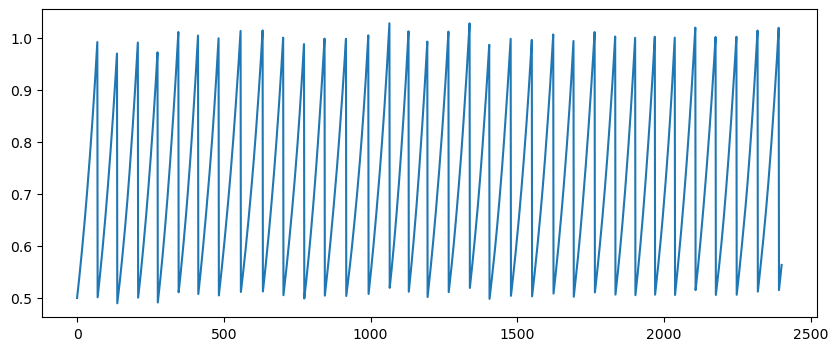

In [ ]:
fig,ax = subplots(figsize=(10,4))
ax.plot(sims[end].M)
fig